# **Comparação de carteiras simples**

# 1. Instalando e importando bibliotecas

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 13.0 MB/s 
     |████████████████████████████████| 63 kB 904 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Importando dados

Criação de cesta de ativos que podem ser usados na construção das carteiras

* <b> Fundos imobiliários:</b> MXRF11, XPLG11 e HCTR11

* <b>Ações:</b> BPAN4, VALE3, WEGE3,TOTS3, JHSF3, PRIO3, OIBR3, PETR4, SUZB3, JBSS3, BPAC11, MGLU3, LREN3

* <b>ETFs:</b>
SMAL11, IVVB11

* <b>BDRs:</b>
COCA34, AAPL34, TSLA34, MSBR34, MSFT34, AMZON34

Vamos transformar isso numa lista

In [ ]:
ativos = ['MXRF11', 'XPLG11', 'HCTR11','BPAN4', 'VALE3', 'WEGE3' ,'TOTS3', 'JHSF3' ,'PRIO3', 'OIBR3', 'PETR4' ,'SUZB3' ,'JBSS3',
'BPAC11', 'LREN3', 'SMAL11', 'IVVB11', 'COCA34' ,'AAPL34','TSLA34','MSBR34' ,'MSFT34','AMZO34']

In [ ]:
ativos = [i + '.SA' for i in ativos]

In [ ]:
inicio = '2020-06-01'
fim = '2022-03-10'

In [ ]:
precos = yf.download(ativos, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  23 of 23 completed


In [ ]:
precos.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,OIBR3.SA,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-01,42.736248,4.231847,12.160340,5.731422,40.595886,114.505234,177.149994,18.980442,4.476347,39.645065,...,0.80,13.553772,6.258,96.830002,37.430344,20.113428,30.191750,41.974358,20.597422,NaN
2020-06-02,41.580681,4.102866,13.414208,6.629345,38.978409,115.273079,173.500000,18.850794,4.737106,40.747665,...,0.83,14.267129,6.718,101.050003,37.401138,20.418474,29.000000,41.974358,20.724443,NaN
2020-06-03,40.862160,4.017133,14.430400,8.023991,39.003887,115.681297,171.300003,17.804968,4.937021,42.730400,...,0.82,14.313795,6.496,105.199997,37.118828,21.136812,28.100000,42.162937,20.812384,NaN
2020-06-04,40.625114,4.025471,14.612295,8.558925,38.879719,115.972885,171.979996,18.556923,5.206470,43.097931,...,0.83,14.287127,6.784,105.029999,38.793217,21.343458,27.674999,43.734421,21.398643,114.055511
2020-06-05,40.494251,3.945859,14.609870,8.587581,39.067566,116.633804,170.899994,18.107481,5.258623,44.471348,...,0.84,14.733810,7.454,107.790001,37.284321,20.428314,27.599751,42.909389,21.657585,115.781982


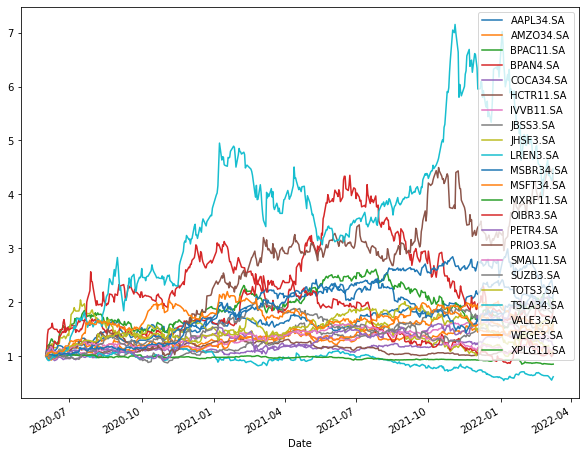

In [ ]:
(precos/precos.iloc[0]).plot(figsize = (10,8));

In [ ]:
precos = precos.dropna()

In [ ]:
# Remover .SA do nome das colunas
#precos.columns = precos.columns.str.replace(r'.SA$', '')

In [ ]:
precos.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,OIBR3.SA,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,40.625114,4.025471,14.612295,8.558925,38.879719,115.972885,171.979996,18.556923,5.206470,43.097931,...,0.83,14.287127,6.784,105.029999,38.793217,21.343458,27.674999,43.734421,21.398643,114.055511
2020-06-05,40.494251,3.945859,14.609870,8.587581,39.067566,116.633804,170.899994,18.107481,5.258623,44.471348,...,0.84,14.733810,7.454,107.790001,37.284321,20.428314,27.599751,42.909389,21.657585,115.781982
2020-06-08,40.047333,3.927388,16.011679,8.788180,38.605885,116.624084,169.000000,18.919937,5.449845,44.693794,...,0.86,15.020485,7.472,112.980003,37.148037,20.694002,28.717251,43.042965,22.375759,116.906654
2020-06-09,41.346111,4.068789,15.904968,9.218037,37.949986,116.225594,169.149994,19.066874,5.501997,44.316589,...,0.92,14.480470,7.040,110.809998,37.157768,20.772726,29.075001,43.207977,22.380644,117.370338
2020-06-10,42.869579,4.168152,15.366556,8.711761,38.207890,116.624084,170.509995,19.092802,5.171702,42.459591,...,0.91,14.267129,6.584,107.099998,37.118828,21.146652,31.375000,42.587238,21.980026,119.185593


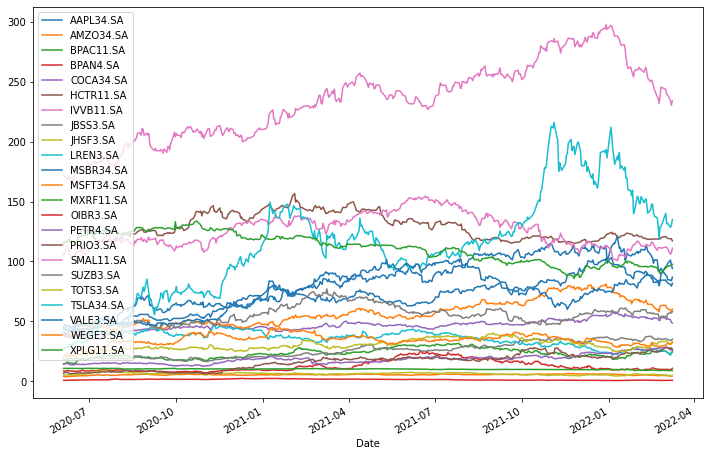

In [ ]:
precos.plot(figsize = (12,8))

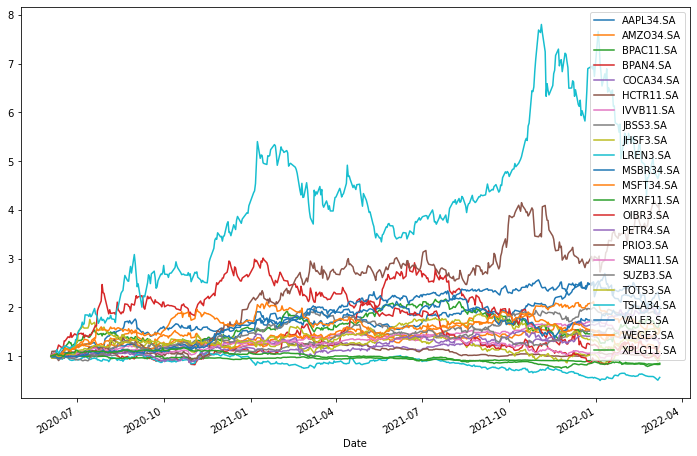

In [ ]:
(precos/precos.iloc[0]).plot(figsize = (12,8));

# 3. Criação da primeira carteira fictícia

Criação de um dicionário que determina as alocações

In [ ]:
precos.columns

Index(['AAPL34.SA', 'AMZO34.SA', 'BPAC11.SA', 'BPAN4.SA', 'COCA34.SA',
       'HCTR11.SA', 'IVVB11.SA', 'JBSS3.SA', 'JHSF3.SA', 'LREN3.SA',
       'MSBR34.SA', 'MSFT34.SA', 'MXRF11.SA', 'OIBR3.SA', 'PETR4.SA',
       'PRIO3.SA', 'SMAL11.SA', 'SUZB3.SA', 'TOTS3.SA', 'TSLA34.SA',
       'VALE3.SA', 'WEGE3.SA', 'XPLG11.SA'],
      dtype='object')

In [ ]:
compras = {
    'AAPL34.SA':14000,
    'BPAC11.SA':8000,
    'COCA34.SA':6000,
    'HCTR11.SA':4000,
    'IVVB11.SA':9000,
    'MSBR34.SA':4000,
    'OIBR3.SA':3000,
    'PETR4.SA':17000,
    'SMAL11.SA': 20000,
    'WEGE3.SA':15000

}

Verificando se o valor estipulado da carteira está correto

In [ ]:
sum(compras.values())

100000

Preço dos ativos no primeiro dia de investimento

In [ ]:
primeiro = precos.iloc[0]

Transformando dicionário de alocações em dataframe

In [ ]:
list(compras.keys())

['AAPL34.SA',
 'BPAC11.SA',
 'COCA34.SA',
 'HCTR11.SA',
 'IVVB11.SA',
 'MSBR34.SA',
 'OIBR3.SA',
 'PETR4.SA',
 'SMAL11.SA',
 'WEGE3.SA']

In [ ]:
compras_df = pd.Series(data = compras, index = list(compras.keys()))

Quantidade de papéis comprados de cada ativo

In [ ]:
qtd_acoes = compras_df/primeiro

In [ ]:
qtd_acoes = round(qtd_acoes,0)

In [ ]:
PL = precos*qtd_acoes

In [ ]:
PL.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,OIBR3.SA,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,14015.664482,NaN,7992.925447,NaN,5987.476692,3943.078094,8942.959778,NaN,NaN,NaN,...,2999.619940,17001.680584,NaN,19955.699768,NaN,NaN,NaN,NaN,15000.449089,NaN
2020-06-05,13970.516682,NaN,7991.598866,NaN,6016.405151,3965.549347,8886.799683,NaN,NaN,NaN,...,3035.759905,17533.234406,NaN,20480.100174,NaN,NaN,NaN,NaN,15181.967186,NaN
2020-06-08,13816.329803,NaN,8758.388247,NaN,5945.306221,3965.218872,8788.000000,NaN,NaN,NaN,...,3108.040052,17874.377060,NaN,21466.200638,NaN,NaN,NaN,NaN,15685.407146,NaN
2020-06-09,14264.408398,NaN,8700.017639,NaN,5844.297768,3951.670181,8795.799683,NaN,NaN,NaN,...,3324.880060,17231.758947,NaN,21053.899536,NaN,NaN,NaN,NaN,15688.831335,NaN
2020-06-10,14790.004864,NaN,8405.506224,NaN,5884.014992,3965.218872,8866.519714,NaN,NaN,NaN,...,3288.740095,16977.883444,NaN,20348.999710,NaN,NaN,NaN,NaN,15407.998398,NaN


In [ ]:
PL['PL Total'] = PL.sum(axis = 1)

In [ ]:
PL.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,14015.664482,NaN,7992.925447,NaN,5987.476692,3943.078094,8942.959778,NaN,NaN,NaN,...,17001.680584,NaN,19955.699768,NaN,NaN,NaN,NaN,15000.449089,NaN,99841.886360
2020-06-05,13970.516682,NaN,7991.598866,NaN,6016.405151,3965.549347,8886.799683,NaN,NaN,NaN,...,17533.234406,NaN,20480.100174,NaN,NaN,NaN,NaN,15181.967186,NaN,101262.354274
2020-06-08,13816.329803,NaN,8758.388247,NaN,5945.306221,3965.218872,8788.000000,NaN,NaN,NaN,...,17874.377060,NaN,21466.200638,NaN,NaN,NaN,NaN,15685.407146,NaN,103536.256721
2020-06-09,14264.408398,NaN,8700.017639,NaN,5844.297768,3951.670181,8795.799683,NaN,NaN,NaN,...,17231.758947,NaN,21053.899536,NaN,NaN,NaN,NaN,15688.831335,NaN,102984.552229
2020-06-10,14790.004864,NaN,8405.506224,NaN,5884.014992,3965.218872,8866.519714,NaN,NaN,NaN,...,16977.883444,NaN,20348.999710,NaN,NaN,NaN,NaN,15407.998398,NaN,102063.874994


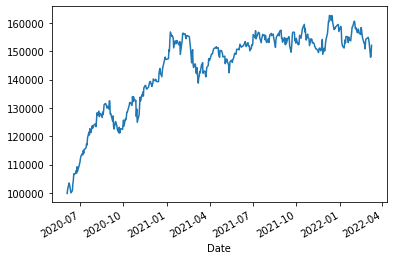

In [ ]:
PL['PL Total'].plot();

# 4. Comparando nossa carteira com o Ibov

In [ ]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov.rename(columns={'Adj Close': 'IBOV'}, inplace = True)

In [ ]:
ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1, inplace = True)

In [ ]:
ibov.head()

,IBOV
Date,
2020-06-01,88620.0
2020-06-02,91046.0
2020-06-03,93002.0
2020-06-04,93829.0
2020-06-05,94637.0


In [ ]:
consolidado = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [ ]:
consolidado.head()

,IBOV,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,93829.0,14015.664482,NaN,7992.925447,NaN,5987.476692,3943.078094,8942.959778,NaN,NaN,...,17001.680584,NaN,19955.699768,NaN,NaN,NaN,NaN,15000.449089,NaN,99841.886360
2020-06-05,94637.0,13970.516682,NaN,7991.598866,NaN,6016.405151,3965.549347,8886.799683,NaN,NaN,...,17533.234406,NaN,20480.100174,NaN,NaN,NaN,NaN,15181.967186,NaN,101262.354274
2020-06-08,97645.0,13816.329803,NaN,8758.388247,NaN,5945.306221,3965.218872,8788.000000,NaN,NaN,...,17874.377060,NaN,21466.200638,NaN,NaN,NaN,NaN,15685.407146,NaN,103536.256721
2020-06-09,96747.0,14264.408398,NaN,8700.017639,NaN,5844.297768,3951.670181,8795.799683,NaN,NaN,...,17231.758947,NaN,21053.899536,NaN,NaN,NaN,NaN,15688.831335,NaN,102984.552229
2020-06-10,94686.0,14790.004864,NaN,8405.506224,NaN,5884.014992,3965.218872,8866.519714,NaN,NaN,...,16977.883444,NaN,20348.999710,NaN,NaN,NaN,NaN,15407.998398,NaN,102063.874994


Normalizando os dados para ajustar a escala

In [ ]:
consolidado_adj = consolidado/consolidado.iloc[0]

In [ ]:
consolidado_adj.tail()

,IBOV,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-03,1.227403,2.042243,NaN,1.688304,NaN,1.330078,1.032937,1.392022,NaN,NaN,...,1.965807,NaN,1.066362,NaN,NaN,NaN,NaN,1.458740,NaN,1.544785
2022-03-04,1.220028,2.022334,NaN,1.630134,NaN,1.341316,1.029165,1.390278,NaN,NaN,...,1.965233,NaN,1.053985,NaN,NaN,NaN,NaN,1.470877,NaN,1.532323
2022-03-07,1.189323,1.988907,NaN,1.574017,NaN,1.322927,1.024891,1.360623,NaN,NaN,...,1.825720,NaN,1.009235,NaN,NaN,NaN,NaN,1.450804,NaN,1.481366
2022-03-08,1.185167,1.954989,NaN,1.632872,NaN,1.262144,1.025562,1.339691,NaN,NaN,...,1.863613,NaN,1.021042,NaN,NaN,NaN,NaN,1.473678,NaN,1.488759
2022-03-09,1.213910,2.015207,NaN,1.710888,NaN,1.251418,1.010141,1.360623,NaN,NaN,...,1.869354,NaN,1.057793,NaN,NaN,NaN,NaN,1.525025,NaN,1.523839


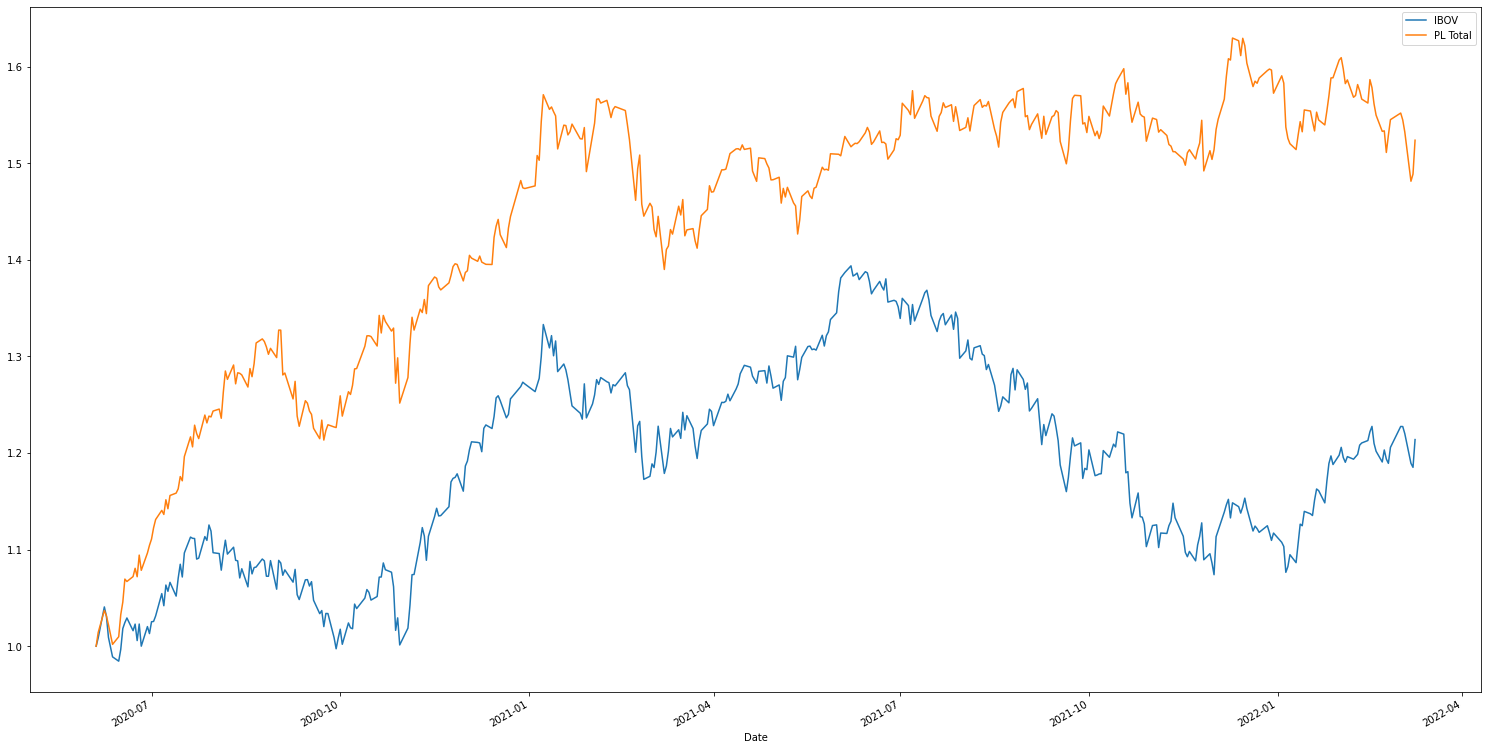

In [ ]:
consolidado_adj[['IBOV', 'PL Total']].plot(figsize = (26,14))

# 5. Construção de novas carteiras

## 5.1. Carteira 02

In [ ]:
compras02 = {
    'AAPL34.SA':14000,
    'BPAC11.SA':8000,
    'OIBR3.SA':3000,
    'PETR4.SA':17000,
    'SMAL11.SA': 20000,
    'WEGE3.SA':15000

}

In [ ]:
sum(compras02.values())

77000

In [ ]:
primeiro02 = precos.iloc[0]

compras_df02 = pd.Series(data = compras02, index = list(compras02.keys()))

qtd_acoes02 = compras_df02/primeiro02

qtd_acoes02 = round(qtd_acoes02,0)

PL02 = precos*qtd_acoes02

PL02['PL Total'] = PL02.sum(axis = 1)

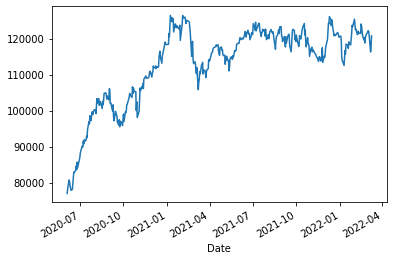

In [ ]:
PL02['PL Total'].plot();

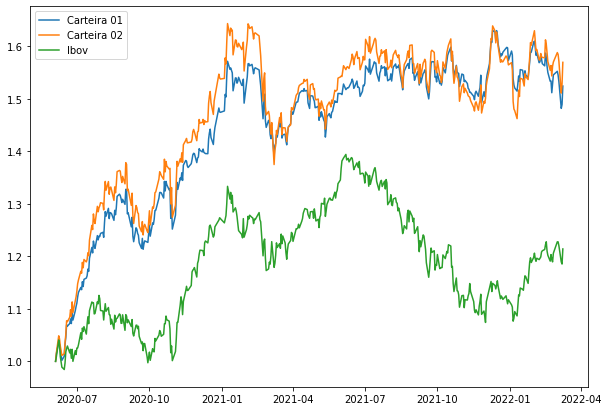

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)

plt.plot(consolidado_adj['PL Total'])

plt.plot(PL02['PL Total']/PL02['PL Total'].iloc[0])

plt.plot(consolidado_adj['IBOV'])

nomes = ['Carteira 01', 'Carteira 02', 'Ibov']

plt.legend(nomes);

plt.show()

# 6. Criação de funções para agilizar o processo

In [ ]:
compras03 = {
    'AAPL34.SA':14000,
    'OIBR3.SA':15000,
    'PETR4.SA':17000,
    'WEGE3.SA':15000,
    'TSLA34.SA': 5000

}

In [ ]:
def cria_carteiras(cotacoes, alocacoes):

  alocacoes_df = pd.Series(data = alocacoes, index = list(alocacoes.keys()))

  primeiro02 = cotacoes.iloc[0]

  PL_carteira = cotacoes*(round(alocacoes_df/primeiro02,0))

  PL_carteira['PL Total'] = PL_carteira.sum(axis = 1)

  df_normalizado = PL_carteira/PL_carteira.iloc[0]

  carteira_final = df_normalizado['PL Total']

  return carteira_final;

In [ ]:
carteira03 = cria_carteiras(precos,compras03)

In [ ]:
carteira03.head()

Date
2020-06-04    1.000000
2020-06-05    1.012647
2020-06-08    1.031641
2020-06-09    1.046149
2020-06-10    1.049579
Name: PL Total, dtype: float64

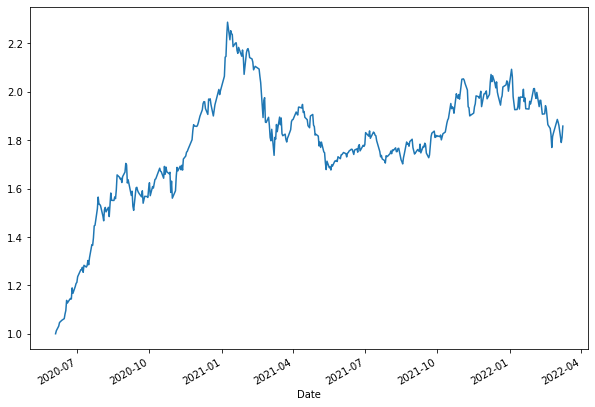

In [ ]:
carteira03.plot();

### Verificando visualmente

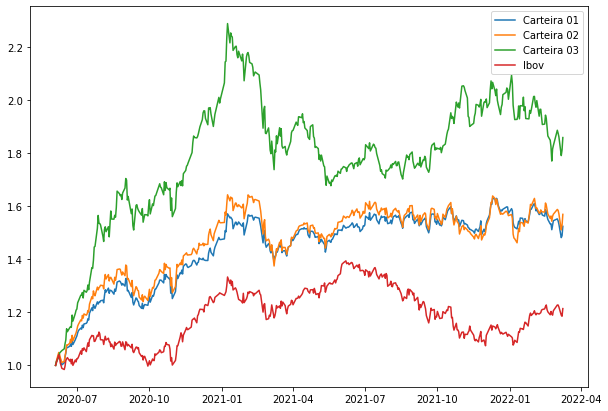

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)

plt.plot(consolidado_adj['PL Total'])

plt.plot(PL02['PL Total']/PL02['PL Total'].iloc[0])

plt.plot(carteira03)

plt.plot(consolidado_adj['IBOV'])

nomes = ['Carteira 01', 'Carteira 02', 'Carteira 03' ,'Ibov']

plt.legend(nomes);

plt.show()

In [ ]:
carteira01 = consolidado_adj['PL Total']

carteira02 =   PL02['PL Total']/PL02['PL Total'].iloc[0]

In [ ]:
carteiras = [carteira01, carteira02, carteira03]

nomes = ['Carteira 01', 'Carteira 02', 'Carteira 03' ,'S&P 500']

In [ ]:
def compara_carteiras(portfolios, benchmark, start, end, legenda):

  import matplotlib.pyplot as plt

  plt.rcParams["figure.figsize"] = (20,12)

  bench = yf.download(benchmark, start = inicio, end = fim, progress = False)['Adj Close']

  bench_norm = bench/bench.iloc[0]

  # plot das carteiras
  for portfolio in portfolios:
    plt.plot(portfolio)

  plt.plot(bench_norm)

  plt.legend(legenda);

  plt.show()

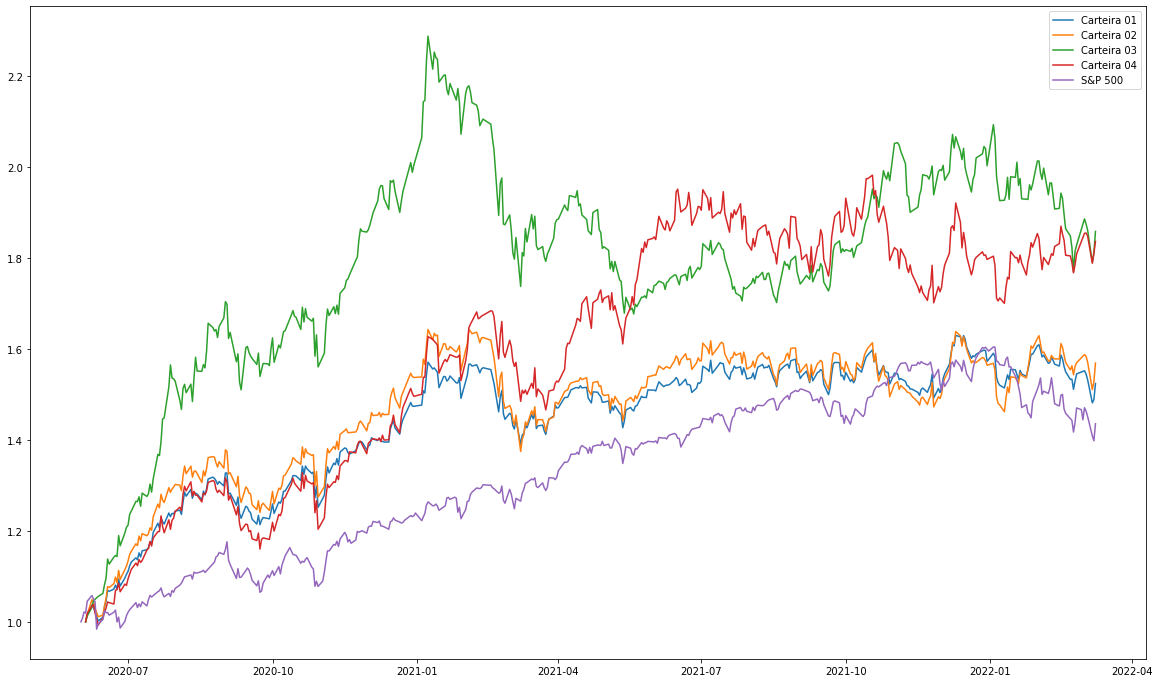

In [ ]:
compara_carteiras(carteiras, 'SPY', inicio, fim, nomes)

# 7. Teste das novas funções

In [ ]:
compras04 = {
    'AAPL34.SA':14000,
    'BPAN4.SA':15000,
    'PETR4.SA':17000,
    'WEGE3.SA':15000,
    'PRIO3.SA': 5000

}

In [ ]:
carteira04 = cria_carteiras(precos,compras04)

In [ ]:
carteira04.head()

Date
2020-06-04    1.000000
2020-06-05    1.018357
2020-06-08    1.034341
2020-06-09    1.038038
2020-06-10    1.019367
Name: PL Total, dtype: float64

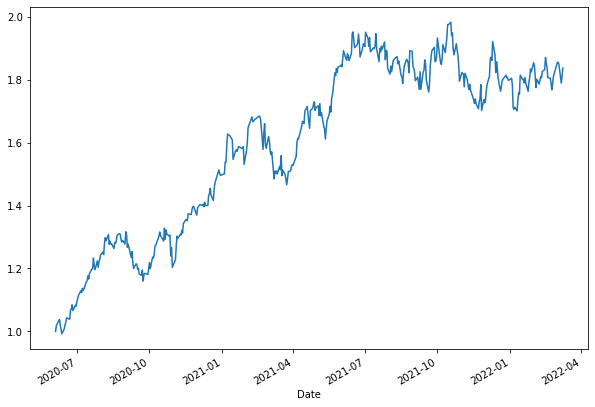

In [ ]:
carteira04.plot()

In [ ]:
carteiras = [carteira01, carteira02, carteira03, carteira04]

nomes = ['Carteira 01', 'Carteira 02', 'Carteira 03', 'Carteira 04' ,'S&P 500']

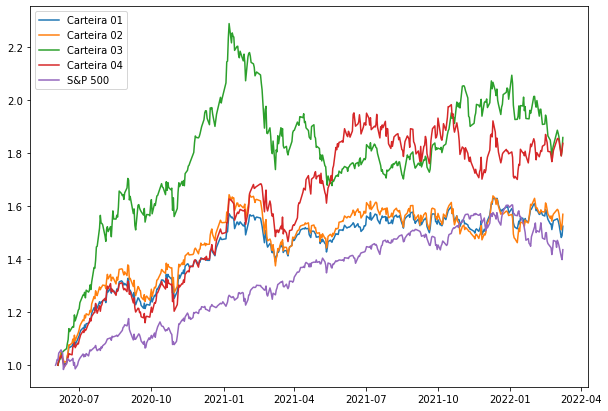

In [ ]:
compara_carteiras(carteiras, 'SPY', inicio, fim, nomes)

# 8. Realização de novos aportes

Determine quais serão os novos aportes

In [ ]:
novos_aportes = {

    'OIBR3.SA':10000,
    'PETR4.SA':3000,
    'WEGE3.SA':3000

}

Quando os novos aportes aconteceram?

In [ ]:
data_aporte = '2021-08-18'

Preços dos ativos no dia do aporte

In [ ]:
precos.loc[data_aporte]

AAPL34.SA     78.819366
AMZO34.SA    109.910004
BPAC11.SA     27.199356
BPAN4.SA      18.017035
COCA34.SA     49.473209
HCTR11.SA    121.400002
IVVB11.SA    256.500000
JBSS3.SA      28.681120
JHSF3.SA       6.291470
LREN3.SA      35.146122
MSBR34.SA    106.798210
MSFT34.SA     65.142517
MXRF11.SA      9.940000
OIBR3.SA       1.010000
PETR4.SA      23.848091
PRIO3.SA      17.280001
SMAL11.SA    130.270004
SUZB3.SA      55.468079
TOTS3.SA      34.441170
TSLA34.SA    112.570000
VALE3.SA      90.226936
WEGE3.SA      33.301537
XPLG11.SA    101.809998
Name: 2021-08-18 00:00:00, dtype: float64

Quanto a nossa carteira tinha nesse dia?

In [ ]:
PL.loc[data_aporte]

AAPL34.SA     27113.862061
AMZO34.SA              NaN
BPAC11.SA     14878.047775
BPAN4.SA               NaN
COCA34.SA      7618.874245
HCTR11.SA      4127.600052
IVVB11.SA     13338.000000
JBSS3.SA               NaN
JHSF3.SA               NaN
LREN3.SA               NaN
MSBR34.SA      9398.242493
MSFT34.SA              NaN
MXRF11.SA              NaN
OIBR3.SA       3650.139966
PETR4.SA      23275.736938
PRIO3.SA               NaN
SMAL11.SA     24751.300812
SUZB3.SA               NaN
TOTS3.SA               NaN
TSLA34.SA              NaN
VALE3.SA               NaN
WEGE3.SA      23311.075592
XPLG11.SA              NaN
PL Total     151462.879933
Name: 2021-08-18 00:00:00, dtype: float64

Premissas:

1. Aportes serão feitos em ativos que já estavam na carteira
2. As compras vão ser feitas logo no início do pregão

In [ ]:
novos_aportes_df = pd.Series(data = novos_aportes, index = list(novos_aportes.keys()))

In [ ]:
sum(novos_aportes.values())

16000

Preços dos ativos no dia do aporte

In [ ]:
precos_segundo_aporte = precos.loc[data_aporte]

Número de papéis comprados no segundo aporte

In [ ]:
qtd_acoes_segundo  = round(novos_aportes_df/precos_segundo_aporte,0)

In [ ]:
qtd_acoes_segundo

AAPL34.SA       NaN
AMZO34.SA       NaN
BPAC11.SA       NaN
BPAN4.SA        NaN
COCA34.SA       NaN
HCTR11.SA       NaN
IVVB11.SA       NaN
JBSS3.SA        NaN
JHSF3.SA        NaN
LREN3.SA        NaN
MSBR34.SA       NaN
MSFT34.SA       NaN
MXRF11.SA       NaN
OIBR3.SA     9901.0
PETR4.SA      126.0
PRIO3.SA        NaN
SMAL11.SA       NaN
SUZB3.SA        NaN
TOTS3.SA        NaN
TSLA34.SA       NaN
VALE3.SA        NaN
WEGE3.SA       90.0
XPLG11.SA       NaN
dtype: float64

### Criação do dataframe exclusivo do novo aporte

In [ ]:
novo_PL = pd.DataFrame(data = None, index = precos.index, columns = precos.columns)

In [ ]:
novo_PL.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,OIBR3.SA,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Qual a variação de patrimônio para as novas posições montadas?

In [ ]:
novos_PL = precos*qtd_acoes_segundo

In [ ]:
novos_PL.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,OIBR3.SA,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8217.829835,2194.640751,NaN,NaN,NaN,NaN,NaN,NaN,1928.034325,NaN
2020-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8316.839740,2263.255486,NaN,NaN,NaN,NaN,NaN,NaN,1951.364651,NaN
2020-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8514.860142,2307.291607,NaN,NaN,NaN,NaN,NaN,NaN,2016.072407,NaN
2020-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9108.920165,2224.339508,NaN,NaN,NaN,NaN,NaN,NaN,2016.512890,NaN
2020-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9009.910260,2191.568184,NaN,NaN,NaN,NaN,NaN,NaN,1980.416622,NaN


Vamos preencher os NaN com zeros

In [ ]:
novos_PL = novos_PL.fillna(0)

O que houve antes do aporte deve ser zero

In [ ]:
novos_PL[novos_PL.index < data_aporte] = 0

In [ ]:
novos_PL.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,OIBR3.SA,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
novos_PL.tail()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,OIBR3.SA,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8811.889858,4314.240211,0.0,0.0,0.0,0.0,0.0,0.0,2812.500000,0.0
2022-03-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8316.839740,4312.979942,0.0,0.0,0.0,0.0,0.0,0.0,2835.900021,0.0
2022-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7821.790212,4006.799904,0.0,0.0,0.0,0.0,0.0,0.0,2797.199993,0.0
2022-03-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8118.819929,4089.959885,0.0,0.0,0.0,0.0,0.0,0.0,2841.299973,0.0
2022-03-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8415.850236,4102.560173,0.0,0.0,0.0,0.0,0.0,0.0,2940.299835,0.0


### Posições consolidadas

Agora precisamos somar a carteira original com as operações depois do aporte

In [ ]:
carteira_full = pd.concat([PL, novos_PL], axis = 1)

In [ ]:
carteira_full.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,OIBR3.SA,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,13995.864868,NaN,7992.924926,NaN,5983.534813,4056.879990,8942.959778,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-05,13950.779694,NaN,7991.598345,NaN,6012.445648,4080.000000,8886.799683,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-08,13796.811401,NaN,8758.388247,NaN,5941.392540,4079.659927,8788.000000,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-09,14244.255219,NaN,8700.016596,NaN,5840.451057,4065.720062,8795.799683,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-10,14769.111633,NaN,8405.506224,NaN,5880.141258,4079.659927,8866.519714,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
carteira_full.columns

Index(['AAPL34.SA', 'AMZO34.SA', 'BPAC11.SA', 'BPAN4.SA', 'COCA34.SA',
       'HCTR11.SA', 'IVVB11.SA', 'JBSS3.SA', 'JHSF3.SA', 'LREN3.SA',
       'MSBR34.SA', 'MSFT34.SA', 'MXRF11.SA', 'OIBR3.SA', 'PETR4.SA',
       'PRIO3.SA', 'SMAL11.SA', 'SUZB3.SA', 'TOTS3.SA', 'TSLA34.SA',
       'VALE3.SA', 'WEGE3.SA', 'XPLG11.SA', 'PL Total', 'AAPL34.SA',
       'AMZO34.SA', 'BPAC11.SA', 'BPAN4.SA', 'COCA34.SA', 'HCTR11.SA',
       'IVVB11.SA', 'JBSS3.SA', 'JHSF3.SA', 'LREN3.SA', 'MSBR34.SA',
       'MSFT34.SA', 'MXRF11.SA', 'OIBR3.SA', 'PETR4.SA', 'PRIO3.SA',
       'SMAL11.SA', 'SUZB3.SA', 'TOTS3.SA', 'TSLA34.SA', 'VALE3.SA',
       'WEGE3.SA', 'XPLG11.SA'],
      dtype='object')

In [ ]:
carteira_full = carteira_full.groupby(lambda x:x, axis =1).sum()

In [ ]:
carteira_full.columns

Index(['AAPL34.SA', 'AMZO34.SA', 'BPAC11.SA', 'BPAN4.SA', 'COCA34.SA',
       'HCTR11.SA', 'IVVB11.SA', 'JBSS3.SA', 'JHSF3.SA', 'LREN3.SA',
       'MSBR34.SA', 'MSFT34.SA', 'MXRF11.SA', 'OIBR3.SA', 'PETR4.SA',
       'PL Total', 'PRIO3.SA', 'SMAL11.SA', 'SUZB3.SA', 'TOTS3.SA',
       'TSLA34.SA', 'VALE3.SA', 'WEGE3.SA', 'XPLG11.SA'],
      dtype='object')

In [ ]:
carteira_full.drop('PL Total', axis = 1, inplace = True)

In [ ]:
carteira_full.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,OIBR3.SA,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,13995.864868,0.0,7992.924926,0.0,5983.534813,4056.879990,8942.959778,0.0,0.0,0.0,...,2999.619940,16999.756927,0.0,19955.699768,0.0,0.0,0.0,0.0,14995.822525,0.0
2020-06-05,13950.779694,0.0,7991.598345,0.0,6012.445648,4080.000000,8886.799683,0.0,0.0,0.0,...,3035.759905,17531.248840,0.0,20480.100174,0.0,0.0,0.0,0.0,15177.280617,0.0
2020-06-08,13796.811401,0.0,8758.388247,0.0,5941.392540,4079.659927,8788.000000,0.0,0.0,0.0,...,3108.040052,17872.354034,0.0,21466.200638,0.0,0.0,0.0,0.0,15680.563164,0.0
2020-06-09,14244.255219,0.0,8700.016596,0.0,5840.451057,4065.720062,8795.799683,0.0,0.0,0.0,...,3324.880060,17229.804443,0.0,21053.899536,0.0,0.0,0.0,0.0,15683.989143,0.0
2020-06-10,14769.111633,0.0,8405.506224,0.0,5880.141258,4079.659927,8866.519714,0.0,0.0,0.0,...,3288.740095,16975.956726,0.0,20348.999710,0.0,0.0,0.0,0.0,15403.240395,0.0


In [ ]:
carteira_full['PL Total'] = carteira_full.sum(axis = 1)

In [ ]:
carteira_full.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,13995.864868,0.0,7992.924926,0.0,5983.534813,4056.879990,8942.959778,0.0,0.0,0.0,...,16999.756927,0.0,19955.699768,0.0,0.0,0.0,0.0,14995.822525,0.0,99912.634091
2020-06-05,13950.779694,0.0,7991.598345,0.0,6012.445648,4080.000000,8886.799683,0.0,0.0,0.0,...,17531.248840,0.0,20480.100174,0.0,0.0,0.0,0.0,15177.280617,0.0,101333.041653
2020-06-08,13796.811401,0.0,8758.388247,0.0,5941.392540,4079.659927,8788.000000,0.0,0.0,0.0,...,17872.354034,0.0,21466.200638,0.0,0.0,0.0,0.0,15680.563164,0.0,103607.232482
2020-06-09,14244.255219,0.0,8700.016596,0.0,5840.451057,4065.720062,8795.799683,0.0,0.0,0.0,...,17229.804443,0.0,21053.899536,0.0,0.0,0.0,0.0,15683.989143,0.0,103054.638279
2020-06-10,14769.111633,0.0,8405.506224,0.0,5880.141258,4079.659927,8866.519714,0.0,0.0,0.0,...,16975.956726,0.0,20348.999710,0.0,0.0,0.0,0.0,15403.240395,0.0,102133.698162


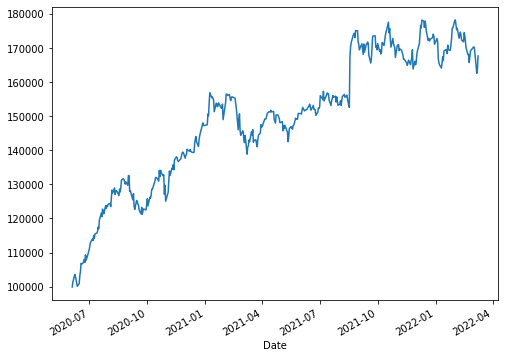

In [ ]:
carteira_full['PL Total'].plot(figsize = (8,6))

In [ ]:
carteira_full.tail()


,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-03,28582.958740,0.0,13494.490042,0.0,7958.571419,4190.500000,12448.799683,0.0,0.0,0.0,...,37732.481850,0.0,21280.000000,0.0,0.0,0.0,0.0,24687.500000,0.0,170209.251271
2022-03-04,28304.319580,0.0,13029.539833,0.0,8025.809540,4175.200104,12433.200317,0.0,0.0,0.0,...,37721.459496,0.0,21032.999420,0.0,0.0,0.0,0.0,24892.900181,0.0,168492.908304
2022-03-07,27836.479370,0.0,12581.000000,0.0,7915.782936,4157.860031,12168.000000,0.0,0.0,0.0,...,35043.599159,0.0,20140.000000,0.0,0.0,0.0,0.0,24553.199940,0.0,162565.971861
2022-03-08,27361.760315,0.0,13051.420334,0.0,7552.084358,4160.580093,11980.799683,0.0,0.0,0.0,...,35770.918991,0.0,20375.599594,0.0,0.0,0.0,0.0,24940.299759,0.0,163729.362762
2022-03-09,28204.559265,0.0,13675.000000,0.0,7487.902809,4098.019958,12168.000000,0.0,0.0,0.0,...,35881.121513,0.0,21108.999710,0.0,0.0,0.0,0.0,25809.298553,0.0,167636.492159


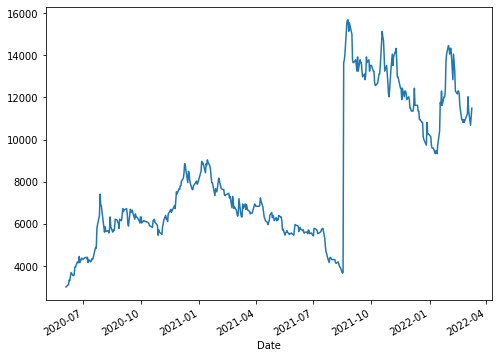

In [ ]:
carteira_full['OIBR3.SA'].plot(figsize = (8,6))

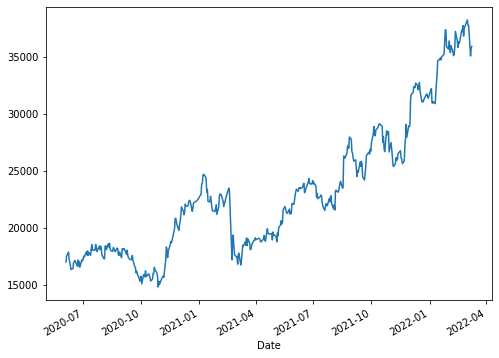

In [ ]:
carteira_full['PETR4.SA'].plot(figsize = (8,6))

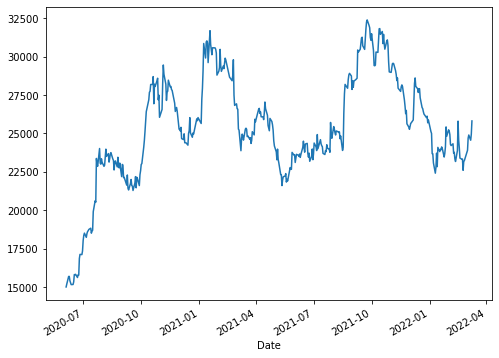

In [ ]:
carteira_full['WEGE3.SA'].plot(figsize = (8,6))

# 9. Cálculo dos retornos diários e da rentabilidade acumulada da carteira

Vamos agora calcular os retornos diários da nossa carteira.

Só que esse cálculo não pode ser feito da forma tradicional, ou seja, considerando simplesmente o retorno de um dia para o outro.

Isso porque o retorno do dia quando houve o aporte ficará distorcido por causa do valor aportado.

Para que o cálculo seja feito corretamente, precisaremos separar os dataframes em dois momentos: antes e depois do aporte

In [ ]:
carteira_full.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,13995.864868,0.0,7992.924926,0.0,5983.534813,4056.879990,8942.959778,0.0,0.0,0.0,...,16999.756927,0.0,19955.699768,0.0,0.0,0.0,0.0,14995.822525,0.0,99912.634091
2020-06-05,13950.779694,0.0,7991.598345,0.0,6012.445648,4080.000000,8886.799683,0.0,0.0,0.0,...,17531.248840,0.0,20480.100174,0.0,0.0,0.0,0.0,15177.280617,0.0,101333.041653
2020-06-08,13796.811401,0.0,8758.388247,0.0,5941.392540,4079.659927,8788.000000,0.0,0.0,0.0,...,17872.354034,0.0,21466.200638,0.0,0.0,0.0,0.0,15680.563164,0.0,103607.232482
2020-06-09,14244.255219,0.0,8700.016596,0.0,5840.451057,4065.720062,8795.799683,0.0,0.0,0.0,...,17229.804443,0.0,21053.899536,0.0,0.0,0.0,0.0,15683.989143,0.0,103054.638279
2020-06-10,14769.111633,0.0,8405.506224,0.0,5880.141258,4079.659927,8866.519714,0.0,0.0,0.0,...,16975.956726,0.0,20348.999710,0.0,0.0,0.0,0.0,15403.240395,0.0,102133.698162


In [ ]:
carteira_full.drop(['PL Total'], axis = 1, inplace = True)

Dividindo o cálculo da rentabilidade em antes e depois do aporte

In [ ]:
antes_aporte = carteira_full[carteira_full.index < data_aporte]

In [ ]:
depois_aporte = carteira_full[carteira_full.index >= data_aporte]

In [ ]:
antes_aporte['PL Total'] = antes_aporte.sum(axis = 1)

depois_aporte['PL Total'] = depois_aporte.sum(axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
antes_aporte.tail()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-11,26118.917542,0.0,16419.954313,0.0,7474.469284,4119.440125,13161.200317,0.0,0.0,0.0,...,23508.930511,0.0,26524.001160,0.0,0.0,0.0,0.0,25095.159149,0.0,155779.264552
2021-08-12,26894.287537,0.0,15943.856234,0.0,7472.965378,4100.059875,13254.799683,0.0,0.0,0.0,...,23861.523468,0.0,26109.799652,0.0,0.0,0.0,0.0,24650.873947,0.0,155711.020437
2021-08-13,26870.270630,0.0,16062.881275,0.0,7528.621071,4161.259979,13254.279968,0.0,0.0,0.0,...,24066.519806,0.0,26077.500000,0.0,0.0,0.0,0.0,24831.364059,0.0,156177.337757
2021-08-16,27336.864197,0.0,15267.581619,0.0,7606.840645,4175.879990,13364.000000,0.0,0.0,0.0,...,23484.329834,0.0,25117.999420,0.0,0.0,0.0,0.0,23887.259674,0.0,153310.691365
2021-08-17,27179.044434,0.0,15164.788546,0.0,7548.175964,4171.120010,13236.600159,0.0,0.0,0.0,...,23484.253510,0.0,24719.001160,0.0,0.0,0.0,0.0,24081.629944,0.0,152588.956462


In [ ]:
depois_aporte.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-18,27113.862061,0.0,14878.047775,0.0,7618.874245,4127.600052,13338.000000,0.0,0.0,0.0,...,26280.596420,0.0,24751.300812,0.0,0.0,0.0,0.0,26308.213882,0.0,167464.887611
2021-08-19,27336.864197,0.0,15359.554424,0.0,7710.631912,4111.279938,13540.280762,0.0,0.0,0.0,...,26133.446732,0.0,25365.000000,0.0,0.0,0.0,0.0,27569.566727,0.0,170247.229792
2021-08-20,27391.755859,0.0,15327.094662,0.0,7686.563538,4123.519958,13509.080444,0.0,0.0,0.0,...,26094.208496,0.0,25822.900696,0.0,0.0,0.0,0.0,28188.493080,0.0,171538.833222
2021-08-23,27690.238953,0.0,15132.326696,0.0,7636.925232,4122.840073,13680.679810,0.0,0.0,0.0,...,26506.222580,0.0,25820.998840,0.0,0.0,0.0,0.0,28008.297234,0.0,173624.373638
2021-08-24,27052.104675,0.0,15505.630659,0.0,7400.762604,4133.039917,13397.799683,0.0,0.0,0.0,...,27055.572590,0.0,26524.001160,0.0,0.0,0.0,0.0,27937.787781,0.0,174021.990157


Configurando posição antes do aporte

In [ ]:
from datetime import datetime, timedelta

In [ ]:
dia_antes_aporte = (datetime.strptime(data_aporte, '%Y-%m-%d') - timedelta(1)).strftime('%Y-%m-%d')

In [ ]:
dia_antes_aporte

'2021-08-17'

Qual era o tamanho da nossa posição no dia antes do aporte?

In [ ]:
antes_aporte.loc[dia_antes_aporte]

AAPL34.SA     27179.044434
AMZO34.SA         0.000000
BPAC11.SA     15164.788546
BPAN4.SA          0.000000
COCA34.SA      7548.175964
HCTR11.SA      4171.120010
IVVB11.SA     13236.600159
JBSS3.SA          0.000000
JHSF3.SA          0.000000
LREN3.SA          0.000000
MSBR34.SA      9318.062805
MSFT34.SA         0.000000
MXRF11.SA         0.000000
OIBR3.SA       3686.279931
PETR4.SA      23484.253510
PRIO3.SA          0.000000
SMAL11.SA     24719.001160
SUZB3.SA          0.000000
TOTS3.SA          0.000000
TSLA34.SA         0.000000
VALE3.SA          0.000000
WEGE3.SA      24081.629944
XPLG11.SA         0.000000
PL Total     152588.956462
Name: 2021-08-17 00:00:00, dtype: float64

In [ ]:
posicao_original = pd.DataFrame(antes_aporte.loc[dia_antes_aporte]).T

In [ ]:
novos_aportes_df

OIBR3.SA    10000
PETR4.SA     3000
WEGE3.SA     3000
dtype: int64

In [ ]:
aportes = pd.DataFrame(novos_aportes_df, columns = [dia_antes_aporte]).T

aportes.index = pd.to_datetime(aportes.index)

In [ ]:
aportes

,OIBR3.SA,PETR4.SA,WEGE3.SA
2021-08-17,10000,3000,3000


In [ ]:
operacoes = pd.concat([posicao_original, aportes], axis = 1)

In [ ]:
operacoes = operacoes.groupby(lambda x:x, axis = 1).sum()

In [ ]:
operacoes

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,PETR4.SA,PL Total,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA
2021-08-17,27179.044434,0.0,15164.788546,0.0,7548.175964,4171.12001,13236.600159,0.0,0.0,0.0,...,26484.25351,152588.956462,0.0,24719.00116,0.0,0.0,0.0,0.0,27081.629944,0.0


In [ ]:
operacoes.drop('PL Total', axis = 1, inplace = True)
operacoes ['PL Total'] = operacoes.sum(axis = 1)

Agora vamos anexar a linha acima ao dataframe "depois_aporte"

In [ ]:
depois_aporte = pd.concat([operacoes, depois_aporte], axis = 0)

In [ ]:
depois_aporte.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
2021-08-17,27179.044434,0.0,15164.788546,0.0,7548.175964,4171.120010,13236.600159,0.0,0.0,0.0,...,26484.253510,0.0,24719.001160,0.0,0.0,0.0,0.0,27081.629944,0.0,168588.956462
2021-08-18,27113.862061,0.0,14878.047775,0.0,7618.874245,4127.600052,13338.000000,0.0,0.0,0.0,...,26280.596420,0.0,24751.300812,0.0,0.0,0.0,0.0,26308.213882,0.0,167464.887611
2021-08-19,27336.864197,0.0,15359.554424,0.0,7710.631912,4111.279938,13540.280762,0.0,0.0,0.0,...,26133.446732,0.0,25365.000000,0.0,0.0,0.0,0.0,27569.566727,0.0,170247.229792
2021-08-20,27391.755859,0.0,15327.094662,0.0,7686.563538,4123.519958,13509.080444,0.0,0.0,0.0,...,26094.208496,0.0,25822.900696,0.0,0.0,0.0,0.0,28188.493080,0.0,171538.833222
2021-08-23,27690.238953,0.0,15132.326696,0.0,7636.925232,4122.840073,13680.679810,0.0,0.0,0.0,...,26506.222580,0.0,25820.998840,0.0,0.0,0.0,0.0,28008.297234,0.0,173624.373638


In [ ]:
rentabilidade_antes_aporte = antes_aporte.pct_change()

rentabilidade_depois_aporte = depois_aporte.pct_change()

In [ ]:
rentabilidade_antes_aporte.tail()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-11,0.004354,NaN,-0.023802,NaN,0.011193,-0.006071,0.009171,NaN,NaN,NaN,...,0.013791,NaN,-0.005344,NaN,NaN,NaN,NaN,0.001663,NaN,0.001311
2021-08-12,0.029686,NaN,-0.028995,NaN,-0.000201,-0.004705,0.007112,NaN,NaN,NaN,...,0.014998,NaN,-0.015616,NaN,NaN,NaN,NaN,-0.017704,NaN,-0.000438
2021-08-13,-0.000893,NaN,0.007465,NaN,0.007448,0.014927,-0.000039,NaN,NaN,NaN,...,0.008591,NaN,-0.001237,NaN,NaN,NaN,NaN,0.007322,NaN,0.002995
2021-08-16,0.017365,NaN,-0.049512,NaN,0.010390,0.003513,0.008278,NaN,NaN,NaN,...,-0.024191,NaN,-0.036794,NaN,NaN,NaN,NaN,-0.038021,NaN,-0.018355
2021-08-17,-0.005773,NaN,-0.006733,NaN,-0.007712,-0.001140,-0.009533,NaN,NaN,NaN,...,-0.000003,NaN,-0.015885,NaN,NaN,NaN,NaN,0.008137,NaN,-0.004708


In [ ]:
rentabilidade_depois_aporte.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
2021-08-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-18,-0.002398,NaN,-0.018908,NaN,0.009366,-0.010434,0.007661,NaN,NaN,NaN,...,-0.007690,NaN,0.001307,NaN,NaN,NaN,NaN,-0.028559,NaN,-0.006668
2021-08-19,0.008225,NaN,0.032364,NaN,0.012043,-0.003954,0.015166,NaN,NaN,NaN,...,-0.005599,NaN,0.024795,NaN,NaN,NaN,NaN,0.047945,NaN,0.016614
2021-08-20,0.002008,NaN,-0.002113,NaN,-0.003121,0.002977,-0.002304,NaN,NaN,NaN,...,-0.001501,NaN,0.018052,NaN,NaN,NaN,NaN,0.022450,NaN,0.007587
2021-08-23,0.010897,NaN,-0.012707,NaN,-0.006458,-0.000165,0.012703,NaN,NaN,NaN,...,0.015789,NaN,-0.000074,NaN,NaN,NaN,NaN,-0.006393,NaN,0.012158


In [ ]:
rentabilidade_antes_aporte = rentabilidade_antes_aporte.dropna(axis = 0, how = 'all')
rentabilidade_depois_aporte = rentabilidade_depois_aporte.dropna(axis = 0, how = 'all')

In [ ]:
rentabilidade_depois_aporte.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
2021-08-18,-0.002398,NaN,-0.018908,NaN,0.009366,-0.010434,0.007661,NaN,NaN,NaN,...,-0.007690,NaN,0.001307,NaN,NaN,NaN,NaN,-0.028559,NaN,-0.006668
2021-08-19,0.008225,NaN,0.032364,NaN,0.012043,-0.003954,0.015166,NaN,NaN,NaN,...,-0.005599,NaN,0.024795,NaN,NaN,NaN,NaN,0.047945,NaN,0.016614
2021-08-20,0.002008,NaN,-0.002113,NaN,-0.003121,0.002977,-0.002304,NaN,NaN,NaN,...,-0.001501,NaN,0.018052,NaN,NaN,NaN,NaN,0.022450,NaN,0.007587
2021-08-23,0.010897,NaN,-0.012707,NaN,-0.006458,-0.000165,0.012703,NaN,NaN,NaN,...,0.015789,NaN,-0.000074,NaN,NaN,NaN,NaN,-0.006393,NaN,0.012158
2021-08-24,-0.023045,NaN,0.024669,NaN,-0.030924,0.002474,-0.020677,NaN,NaN,NaN,...,0.020725,NaN,0.027226,NaN,NaN,NaN,NaN,-0.002517,NaN,0.002290


In [ ]:
rentabilidade_total = pd.concat([rentabilidade_antes_aporte, rentabilidade_depois_aporte], axis = 0)

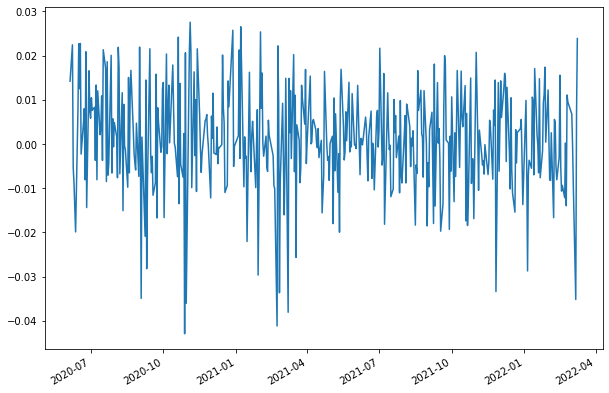

In [ ]:
rentabilidade_total['PL Total'].plot();

In [ ]:
retorno_acumulado = (1+ rentabilidade_total).cumprod()

In [ ]:
retorno_acumulado.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
2020-06-05,0.996779,NaN,0.999834,NaN,1.004832,1.005699,0.993720,NaN,NaN,NaN,...,1.031265,NaN,1.026278,NaN,NaN,NaN,NaN,1.012101,NaN,1.014216
2020-06-08,0.985778,NaN,1.095768,NaN,0.992957,1.005615,0.982672,NaN,NaN,NaN,...,1.051330,NaN,1.075693,NaN,NaN,NaN,NaN,1.045662,NaN,1.036978
2020-06-09,1.017747,NaN,1.088465,NaN,0.976087,1.002179,0.983545,NaN,NaN,NaN,...,1.013532,NaN,1.055032,NaN,NaN,NaN,NaN,1.045891,NaN,1.031448
2020-06-10,1.055248,NaN,1.051618,NaN,0.982720,1.005615,0.991452,NaN,NaN,NaN,...,0.998600,NaN,1.019709,NaN,NaN,NaN,NaN,1.027169,NaN,1.022230
2020-06-12,1.033368,NaN,1.045809,NaN,0.954650,0.997737,0.964066,NaN,NaN,NaN,...,0.961269,NaN,0.992574,NaN,NaN,NaN,NaN,1.010274,NaN,1.001898


In [ ]:
retorno_acumulado['Date'] = pd.to_datetime(retorno_acumulado.index)
retorno_acumulado.index = retorno_acumulado['Date']
retorno_acumulado.drop(['Date'], axis = 1, inplace = True)

In [ ]:
carteira_aportes = retorno_acumulado['PL Total']

In [ ]:
carteira_aportes

Date
2020-06-05    1.014216
2020-06-08    1.036978
2020-06-09    1.031448
2020-06-10    1.022230
2020-06-12    1.001898
                ...   
2022-03-03    1.541902
2022-03-04    1.526354
2022-03-07    1.472662
2022-03-08    1.483201
2022-03-09    1.518596
Name: PL Total, Length: 435, dtype: float64

In [ ]:
nomes = ['Carteira com Aporte', 'IBOV']

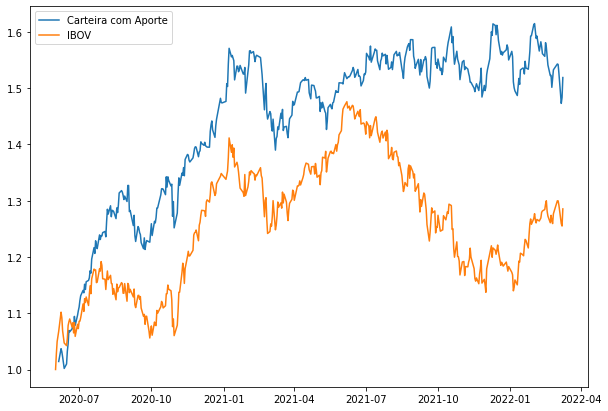

In [ ]:
compara_carteiras([carteira_aportes], '^BVSP', inicio, fim, nomes)

In [ ]:
nomes

['Carteira com Aporte', 'IBOV']

# 10. Criação de uma função para contabilizar novos aportes

In [ ]:
def configura_aportes(data_aporte, dic_aportes, precos, carteira_anterior):

  # Novos aportes em formato de dataframe
  nova_compra_df = pd.Series(data = dic_aportes, index = list(dic_aportes.keys()))

  # preço dos ativos no dia do novo aporte
  precos_novo_aporte = precos.loc[data_aporte]

  # Quantidade de papéis comprados no novo aporte
  qtd_acoes_nova_compra = round(nova_compra_df/precos_novo_aporte,0)

  # Configura novo dataframe que vai conter informações do novo aporte
  novo_PL = pd.DataFrame(data = None, index = precos.index, columns = precos.columns)

  # Oscilação do patrimônio dos ativos comprados no novo aporte
  novo_PL = precos*qtd_acoes_nova_compra

  novo_PL = novo_PL.fillna(0)

  # Configura como zero os valores dos ativos antes do segundo aporte
  # Ou seja: os papéis do segundo aporte na prática não existiam, portanto precisam ser
  # configurados como zero. Lembrando que o patrimônio da carteira inicial está
  # descrito pelo dataframe "carteira_anterior"
  novo_PL[novo_PL.index < data_aporte] = 0

  # Carteira original + novo aporte
  carteira_full = pd.concat([carteira_anterior, novo_PL], axis = 1)

  # Somando colunas de mesmo nome, para agrupar os patrimônios antes e depois do aporte
  carteira_full = carteira_full.groupby(lambda x:x, axis =1).sum()

  # Rentabilidade antes e depois do aporte
  antes_aporte = carteira_full[carteira_full.index < data_aporte]
  depois_aporte = carteira_full[carteira_full.index >= data_aporte]

  # Variação de patrimônio antes e depois do aporte
  antes_aporte['PL Total'] = antes_aporte.sum(axis = 1)
  depois_aporte['PL Total'] = depois_aporte.sum(axis = 1)

  # Encontrando o dia antes do aporte
  from datetime import datetime, timedelta
  dia_antes_aporte = (datetime.strptime(data_aporte, '%Y-%m-%d') - timedelta(1)).strftime('%Y-%m-%d')

  # Configurando momento logo após o aporte
  # A ideia é que a rentabilidade do dia do aporte seja calculada com relação à posição logo depois do aporte, ou seja,
  # aquela equivalente à do dia anterior somada dos valores aportados. Perceba que isto é diferente de calcular a
  # rentabilidade com relação à posição do dia anterior do aporte. Isto geraria uma distorção considerável
  # no cálculo de rentabilidade
  posicao_original = pd.DataFrame(antes_aporte.loc[dia_antes_aporte]).T

  aportes = pd.DataFrame(nova_compra_df, columns = [dia_antes_aporte]).T
  aportes.index = pd.to_datetime(aportes.index)

  # Posição antes do aporte
  operacoes = pd.concat([posicao_original, aportes], axis = 1)
  operacoes = operacoes.groupby(lambda x:x, axis = 1).sum()
  operacoes.drop('PL Total', axis = 1, inplace = True)
  operacoes ['PL Total'] = operacoes.sum(axis = 1)

  # Agora sim, vamos juntar a linha contendo a operação do aporte com o dataframe da carteira após o aporte
  depois_aporte = pd.concat([operacoes, depois_aporte], axis = 0)

  # Retornos diários da carteira, antes e depois do aporte
  rentabilidade_antes_aporte = antes_aporte.pct_change()
  rentabilidade_depois_aporte = depois_aporte.pct_change()

  rentabilidade_antes_aporte = rentabilidade_antes_aporte.dropna(axis = 0, how = 'all')
  rentabilidade_depois_aporte = rentabilidade_depois_aporte.dropna(axis = 0, how = 'all')

  # Juntando tudo num dataframe só
  rentabilidade_total = pd.concat([rentabilidade_antes_aporte, rentabilidade_depois_aporte], axis = 0)

  # Calculando a rentabilidade acumulada e fazendo alguns ajustes
  cum_daily_return = (1+ rentabilidade_total).cumprod()
  cum_daily_return['Date'] = pd.to_datetime(cum_daily_return.index)
  cum_daily_return.index = cum_daily_return['Date']
  cum_daily_return.drop(['Date'], axis = 1, inplace = True)

  return cum_daily_return;

In [ ]:
precos.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,OIBR3.SA,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,40.685654,80.509422,14.612294,8.586428,38.854122,119.320000,171.979996,19.073112,5.206470,43.348930,...,0.83,17.417784,6.784,105.029999,39.380062,21.343456,27.674999,43.742294,21.422604,115.610001
2020-06-05,40.554592,78.917198,14.609869,8.615176,39.041855,120.000000,170.899994,18.611164,5.258622,44.730335,...,0.84,17.962345,7.454,107.790001,37.848339,20.428312,27.599751,42.917114,21.681829,117.360001
2020-06-08,40.107010,78.547768,16.011679,8.816421,38.580471,119.989998,169.000000,19.446224,5.449844,44.954082,...,0.86,18.311838,7.472,112.980003,37.709991,20.694002,28.717251,43.050713,22.400805,118.500000
2020-06-09,41.407719,81.375793,15.904966,9.247659,37.925007,119.580002,169.149994,19.597246,5.501997,44.574680,...,0.92,17.653488,7.040,110.809998,37.719872,20.772724,29.075001,43.215755,22.405699,118.970001
2020-06-10,42.933464,83.363060,15.366556,8.739757,38.182735,119.989998,170.509995,19.623898,5.171702,42.706871,...,0.91,17.393398,6.584,107.099998,37.680347,21.146648,31.375000,42.594902,22.004629,120.809998


In [ ]:
novos_aportes = {'AMZO34.SA': 30000, 'COCA34.SA': 40000}

In [ ]:
PL.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,OIBR3.SA,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,13995.864868,NaN,7992.924926,NaN,5983.534813,4056.879990,8942.959778,NaN,NaN,NaN,...,2999.619940,16999.756927,NaN,19955.699768,NaN,NaN,NaN,NaN,14995.822525,NaN
2020-06-05,13950.779694,NaN,7991.598345,NaN,6012.445648,4080.000000,8886.799683,NaN,NaN,NaN,...,3035.759905,17531.248840,NaN,20480.100174,NaN,NaN,NaN,NaN,15177.280617,NaN
2020-06-08,13796.811401,NaN,8758.388247,NaN,5941.392540,4079.659927,8788.000000,NaN,NaN,NaN,...,3108.040052,17872.354034,NaN,21466.200638,NaN,NaN,NaN,NaN,15680.563164,NaN
2020-06-09,14244.255219,NaN,8700.016596,NaN,5840.451057,4065.720062,8795.799683,NaN,NaN,NaN,...,3324.880060,17229.804443,NaN,21053.899536,NaN,NaN,NaN,NaN,15683.989143,NaN
2020-06-10,14769.111633,NaN,8405.506224,NaN,5880.141258,4079.659927,8866.519714,NaN,NaN,NaN,...,3288.740095,16975.956726,NaN,20348.999710,NaN,NaN,NaN,NaN,15403.240395,NaN


In [ ]:
PL.drop('PL Total', axis = 1, inplace = True)

In [ ]:
carteira_amzn_coca = configura_aportes(data_aporte, novos_aportes, precos, PL)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
carteira_amzn_coca.tail()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-03,2.042243,0.856310,1.688304,NaN,1.320356,1.032937,1.392022,NaN,NaN,NaN,...,1.965807,NaN,1.066362,NaN,NaN,NaN,NaN,1.458740,NaN,1.521593
2022-03-04,2.022334,0.848484,1.630134,NaN,1.331511,1.029165,1.390278,NaN,NaN,NaN,...,1.965233,NaN,1.053985,NaN,NaN,NaN,NaN,1.470876,NaN,1.513874
2022-03-07,1.988907,0.814268,1.574017,NaN,1.313257,1.024891,1.360623,NaN,NaN,NaN,...,1.825720,NaN,1.009235,NaN,NaN,NaN,NaN,1.450804,NaN,1.467963
2022-03-08,1.954989,0.793247,1.632872,NaN,1.252918,1.025562,1.339691,NaN,NaN,NaN,...,1.863612,NaN,1.021042,NaN,NaN,NaN,NaN,1.473677,NaN,1.455598
2022-03-09,2.015207,0.805623,1.710888,NaN,1.242270,1.010141,1.360623,NaN,NaN,NaN,...,1.869354,NaN,1.057793,NaN,NaN,NaN,NaN,1.525025,NaN,1.479836


In [ ]:
nomes = ['Carteira com novos aportes em Amazon e Coca-Cola', 'IBOV']

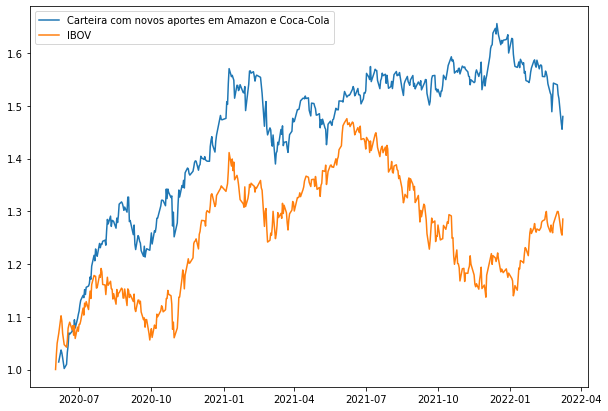

In [ ]:
compara_carteiras([carteira_amzn_coca['PL Total']], '^BVSP', inicio, fim, nomes)

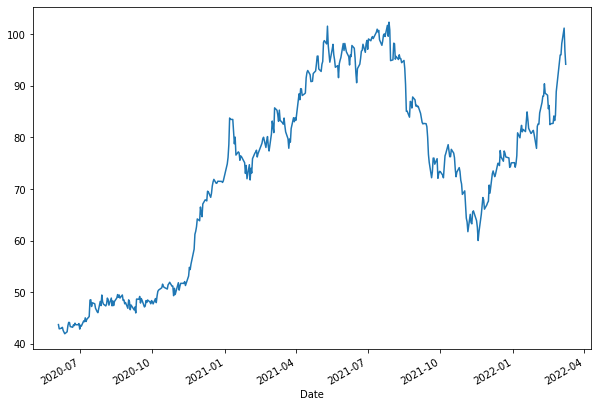

In [ ]:
precos['VALE3.SA'].plot()

In [ ]:
data_aporte = '2021-12-01'

In [ ]:
novos_aportes = {'VALE3.SA': 100000}

In [ ]:
nomes = ['Novo aporte em VALE3', 'IBOV']

In [ ]:
carteira_vale = configura_aportes(data_aporte, novos_aportes, precos, PL)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


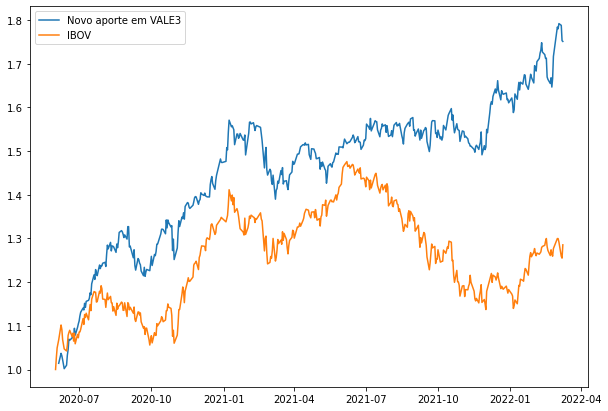

In [ ]:
compara_carteiras([carteira_vale['PL Total']], '^BVSP', inicio, fim, nomes)